<a href="https://colab.research.google.com/github/nickehsani/CSE151A_DARWIN_Alzheimer-s/blob/main/DARWIN_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [240]:
df = pd.read_csv('processed_df.csv')
df.head()

,Unnamed: 0,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 453 entries, Unnamed: 0 to class
dtypes: float64(300), int64(152), object(1)
memory usage: 615.9+ KB


In [242]:
# Drop 'ID' column so we don't use it for the prediction
dt_df = df.drop(columns=['ID', 'Unnamed: 0'])
# Split into X and y, so that y represents the values we are trying to predict (alzheimer's patient or not alzheimer's patient)
X = dt_df.drop(columns = ['class'])
y = dt_df['class']

In [243]:
X.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [245]:
# find train error
model = DecisionTreeClassifier(criterion='entropy')
# train
model.fit(X_train, y_train)
# generate predictions on train set
ypred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, ypred)
print('Training Accuracy: ' + str(train_accuracy))

Training Accuracy: 1.0


In [246]:
# find test error
model = DecisionTreeClassifier(criterion='entropy')
# train
model.fit(X_train, y_train)
# generate predictions on test set
ypred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, ypred)
print('Test Accuracy: ' + str(test_accuracy))

Test Accuracy: 0.6857142857142857


In [247]:
# Balance weights
train_error = []
test_error = []
results = []
for epoch in range(1, 50):
    results += [epoch]
    # find train error
    model = DecisionTreeClassifier(criterion='entropy', max_depth=epoch, class_weight='balanced')
    # train
    model.fit(X_train, y_train)
    # generate predictions on train set
    ypred = model.predict(X_train)
    # find accuracy for train set
    train_error += [accuracy_score(y_train, ypred)]

    # find test error
    model = DecisionTreeClassifier(criterion='entropy', max_depth=epoch, class_weight='balanced')
    # train
    model.fit(X_train, y_train)
    # generate predictions on test set
    ypred = model.predict(X_test)
    # find accuracy for test set
    test_error += [accuracy_score(y_test, ypred)]

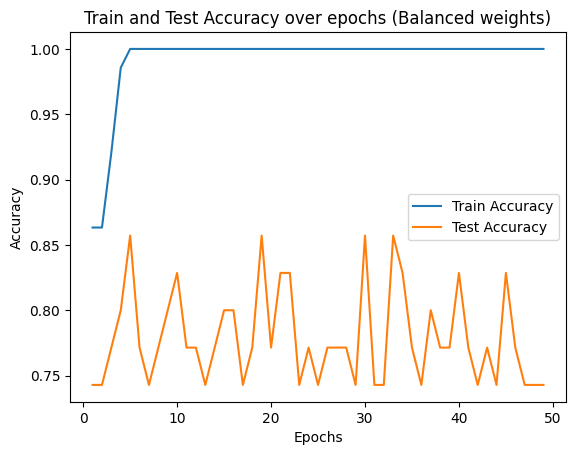

In [248]:
# draw graph
plt.plot(results, train_error, label='Train Accuracy')
plt.plot(results, test_error, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy over epochs (Balanced weights)')
plt.show()

In [249]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [250]:
ypred = rfc.predict(X_train)
# find accuracy for train set
print('Training Accuracy: ' + str(accuracy_score(y_train, ypred)))

Training Accuracy: 1.0


In [251]:
ypred = rfc.predict(X_test)
# find accuracy for test set
print('Test Accuracy: ' + str(accuracy_score(y_test, ypred)))

Test Accuracy: 0.7714285714285715


In [252]:
y.mean()

0.5114942528735632

In [253]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.72      0.81      0.76        16

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35



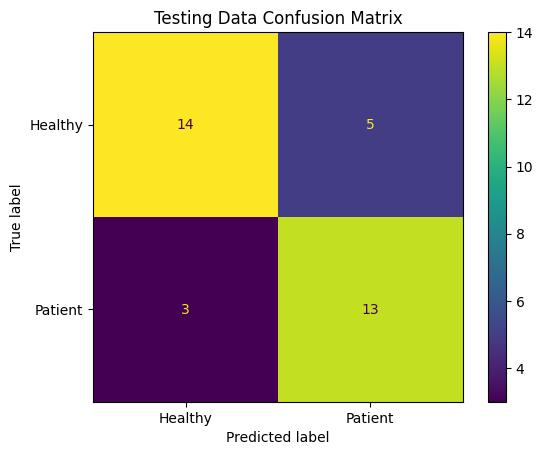

In [254]:
cm = confusion_matrix(y_test, ypred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Patient'])
cmdisp.plot()
plt.title('Testing Data Confusion Matrix')
plt.show()